In [ ]:
%%capture
!wget https://www.dropbox.com/s/gb0lm94weq5u61b/fake%20reviews%20dataset.csv?dl=0
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Loading and Understanding Dataset

In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/fake reviews dataset.csv?dl=0")
# Print Shape of Data and Columns of the Dataset
print("Shape of data : ",data.shape)
print("Columns : ",list(data.columns))
# Top 5 rows of the dataset
data.head()

Shape of data :  (40432, 4)
Columns :  ['category', 'rating', 'label', 'text_']


category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...

In [ ]:
# Get category - Book_5 and filter the 1 ⭐ rating - count of original and computer generated reviews
print("\x1b[31m\"1 STAR RATINGS\"\x1b[0m")
print(data[data['category'] == 'Books_5'][data['rating']==1.0]['label'].value_counts())

# Get category - Book_5 and filter the 2 ⭐ rating - count of original and computer generated reviews
print("\x1b[31m\"2 STAR RATINGS\"\x1b[0m")
print(data[data['category'] == 'Books_5'][data['rating']==2.0]['label'].value_counts())

# Get category - Book_5 and filter the 3 ⭐ rating - count of original and computer generated reviews
print("\x1b[31m\"3 STAR RATINGS\"\x1b[0m")
print(data[data['category'] == 'Books_5'][data['rating']==3.0]['label'].value_counts())

# Get category - Book_5 and filter the 4 ⭐ rating - count of original and computer generated reviews
print("\x1b[31m\"4 STAR RATINGS\"\x1b[0m")
print(data[data['category'] == 'Books_5'][data['rating']==4.0]['label'].value_counts())

# Get category - Book_5 and filter the 5 ⭐ rating - count of original and computer generated reviews
print("\x1b[31m\"5 STAR RATINGS\"\x1b[0m")
print(data[data['category'] == 'Books_5'][data['rating']==5.0]['label'].value_counts())

"1 STAR RATINGS"
CG    90
OR    77
Name: label, dtype: int64
"2 STAR RATINGS"
CG    123
OR     97
Name: label, dtype: int64
"3 STAR RATINGS"
CG    252
OR    229
Name: label, dtype: int64
"4 STAR RATINGS"
OR    496
CG    471
Name: label, dtype: int64
"5 STAR RATINGS"
OR    1286
CG    1249
Name: label, dtype: int64


```Meaning of OR and CG:```

1. OR(1) = Original reviews (presumably human created and authentic)
2. CG(0) = Computer-generated fake reviews.

Observations : ```Original Reviews < Computer Generated``` Reviews for 1 ⭐ ratings.

In [ ]:
print(f"Number of Reviews for each star rating : \n{data['rating'].value_counts()}")

Number of Reviews for each star rating : 
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64


In [ ]:
categories = data['category'].unique()
print("All the Categories Available are :\n\n",categories)

All the Categories Available are :

 ['Home_and_Kitchen_5' 'Sports_and_Outdoors_5' 'Electronics_5'
 'Movies_and_TV_5' 'Tools_and_Home_Improvement_5' 'Pet_Supplies_5'
 'Kindle_Store_5' 'Books_5' 'Toys_and_Games_5'
 'Clothing_Shoes_and_Jewelry_5']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.catplot(x="category",hue="label",kind="bar",data=data,aspect=20/10,stacked="true")
plt.title("Count of Original and Fake Reviews in each category")
plt.xticks(rotation=90)
plt.xlabel("Category Name")
plt.ylabel("Count of Review")

TypeError: ignored

## Working on Kindle Store 5 Dataset Only

### Filtering Data

In [ ]:
# Extract Kindle Store Dataset out of the whole dataset
ks5_data = data[data['category']=='Kindle_Store_5']
# Reset index from 0
ks5_data.reset_index(inplace=True)

# Change the Label to numeric value : OR(original) => 1 and CG(Comp. generated) => 0
review_type = []
for x in ks5_data['label']:
  if x == 'OR':
    review_type.append(1)
  else:
    review_type.append(0)
# Add review type as an additional column
ks5_data['review_type'] = review_type

# Drop the Columns which are not required 
#ks5_data.drop(['category','index','label'], axis = 1,inplace=True)

In [ ]:
ks5_data

index        category  rating label  \
0     23690  Kindle_Store_5     5.0    CG   
1     23691  Kindle_Store_5     5.0    CG   
2     23692  Kindle_Store_5     5.0    CG   
3     23693  Kindle_Store_5     4.0    CG   
4     23694  Kindle_Store_5     5.0    CG   
...     ...             ...     ...   ...   
4725  28415  Kindle_Store_5     3.0    OR   
4726  28416  Kindle_Store_5     5.0    CG   
4727  28417  Kindle_Store_5     4.0    OR   
4728  28418  Kindle_Store_5     5.0    CG   
4729  28419  Kindle_Store_5     4.0    OR   

                                                  text_  review_type  
0     This book I can't wait for more by this author...            0  
1     Love this series cant wait for more by this au...            0  
2     Read the books 2 time reading. The characters ...            0  
3     very enjoyable. I would recommend this book to...            0  
4     Great story can't wait for more. The character...            0  
...                                                 ...          ...  
4725  (Source: I receieved a digital copy of this bo...            1  
4726  This is a beautifully written, sweet, and roma...            0  
4727  When a lie gets blown out of proportion, could...            1  
4728  I received a copy of this book in exchange for...            0  
4729  The book for review is Legacy of Fear by Ryshi...            1  

[4730 rows x 6 columns]

In [ ]:
short_ks5_data = ks5_data[ks5_data['rating']==5.0][:200] #5
short_ks5_data = short_ks5_data.append(ks5_data[ks5_data['rating']==4.0][:200]) #4
short_ks5_data = short_ks5_data.append(ks5_data[ks5_data['rating']==2.0]) #2
short_ks5_data = short_ks5_data.append(ks5_data[ks5_data['rating']==1.0]) #1

In [ ]:
short_ks5_data['rating'].value_counts()

5.0    200
4.0    200
2.0    153
1.0    100
Name: rating, dtype: int64

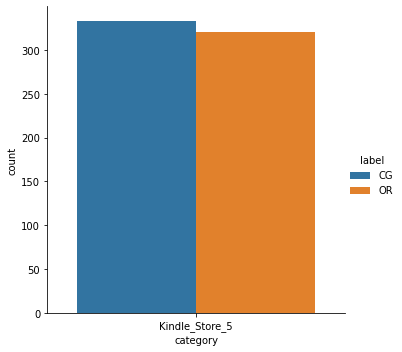

In [ ]:
import seaborn as sns
sns.catplot(x="category",hue="label",kind="count",data=short_ks5_data)

```Note:``` This is preprocessed data that contains only Kindle Store reviews.

### Applying NLP to the content of Reviews

In [ ]:
%%capture
!pip install nltk
!pip install contractions

import contractions
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk import WordNetLemmatizer
nltk.download('wordnet')

lemma = WordNetLemmatizer()

def apply_NLP(x):
  x = contractions.fix(x)
  x = x.lower()
  x = re.sub(r'\d+','',x)
  x = re.sub(r'[^\w\s]', '', x)
  x = word_tokenize(x)
  x = [w for w in x if not w in stopwords.words()]
  x = [ lemma.lemmatize(w, pos = "v") for w in x]
  x = [ lemma.lemmatize(w, pos = "n") for w in x]
  for i in x:
    if(len(i)==1):
      x.remove(i)
  x = ' '.join(x)
  return x

In [ ]:
x = short_ks5_data['text_']
x = np.array(x)

# Apply NLP to each text of the review
for i in range(x.shape[0]):
  x[i] = apply_NLP(x[i])

x = [i.split() for i in x]

In [ ]:
short_ks5_data["NLP_text"] = x
short_ks5_data.reset_index(inplace=True)

In [ ]:
short_ks5_data = short_ks5_data.drop(['index'],axis=1)

In [ ]:
short_ks5_data

rating                                              text_  review_type  \
0       5.0  This book I can't wait for more by this author...            0   
1       5.0  Love this series cant wait for more by this au...            0   
2       5.0  Read the books 2 time reading. The characters ...            0   
3       5.0  Great story can't wait for more. The character...            0   
4       5.0  Fun reading - lots of action and suspense.  No...            0   
..      ...                                                ...          ...   
648     1.0  It is just not particularly consistent.  A mai...            1   
649     1.0  I did not care for this book, as it was too sh...            0   
650     1.0  I couldn't finish. It was painfully one-dimens...            1   
651     1.0  This story was too A LOT of fun. It was a litt...            0   
652     1.0  First and foremost they claim this is an BBW r...            1   

                                              NLP_text  
0         [book, wait, author, definitely, read, next]  
1    [love, series, wait, author, keep, eye, peel, ...  
2    [read, book, time, read, character, well, deve...  
3    [great, story, wait, character, well, develop,...  
4    [fun, read, lot, action, suspense, much, sex, ...  
..                                                 ...  
648  [particularly, consistent, main, character, ge...  
649  [book, short, thing, end, end, abrupt, end, ab...  
650  [could, finish, painfully, onedimensional, rea...  
651  [story, lot, fun, little, bore, character, wel...  
652  [first, foremost, claim, bbw, romance, author,...  

[653 rows x 4 columns]

### Generating Network Graph of the Kindle_Store_5 Reviews

#### Generating Dictonaries for the Network Graph

In [ ]:
# color to be Green for OR and Red for CG
size = short_ks5_data.shape[0]

Colors_dict = {}
for i in range(0,size):
  if ks5_data['review_type'][i] == 1 :
    Colors_dict[i] = '#82E0AA'
  else:
    Colors_dict[i] = '#EC7063'

# Generate all dictionaries
BOW_dict = {}
c_t = []

for j in range(len(x)):
  label = j
  BOW_dict[label] = x[j]  
  for k in x[j]:
      c_t.append(k) 

In [ ]:
threshold = 35

def find_common_with_thresh2(a,b,t):
  if(len(a)>0 and len(b)>0):
      res = len(set(a) & set(b)) / float(len(set(a) | set(b))) * 100
      if(res>=threshold):
        return  len(set(a) & set(b))
      else:
        return 0
  else:
    return 0

#### Generating Original Network Graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()
for i in BOW_dict:
  G.add_node(i)

nx.set_node_attributes(G, Colors_dict, name="color")
node_color = list(Colors_dict.values())

for i in BOW_dict:
  for y in BOW_dict:
    if(i!=y):
      t = find_common_with_thresh2(BOW_dict[i],BOW_dict[y],(i,y))
      if(t != 0):
        G.add_edge(i,y,weight=t)

Network Density:  0.0033070585029923243


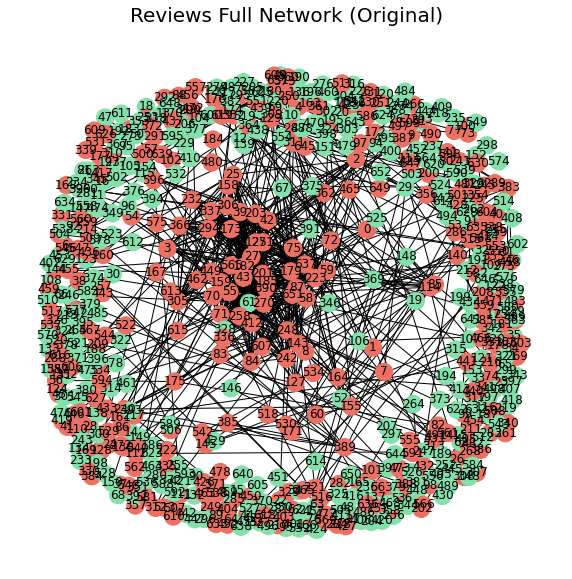

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Reviews Full Network (Original)",size=20)
pos = nx.spring_layout(G, k=0.6, iterations=20)
nx.draw(G, pos,with_labels=True, node_color=node_color)
print("Network Density: ", nx.density(G))

## Generating Various Networks - Part 1

In [ ]:
short_ks_data = short_ks5_data
short_ks_data['rating'].value_counts()

5.0    200
4.0    200
2.0    153
1.0    100
Name: rating, dtype: int64

In [ ]:
MAIN_DICT = {'4/5 fake':[],
             '4/5 real':[],
             '1/2 fake':[],
             '1/2 real':[]
             }

for i in range(short_ks_data.shape[0]):
  # 4 and 5 star reviews
  if(short_ks_data['rating'][i]==4.0 or short_ks_data['rating'][i]==5.0):
    # Real Reviews
    if(short_ks_data['review_type'][i]==1):
      MAIN_DICT['4/5 real'].append(short_ks_data['NLP_text'][i])
    # Fake Reviews
    else:
      MAIN_DICT['4/5 fake'].append(short_ks_data['NLP_text'][i])

  # 1 and 2 star reviews
  elif(short_ks_data['rating'][i]==1.0 or short_ks_data['rating'][i]==2.0):
    # Real Reviews
    if(short_ks_data['review_type'][i]==1):
      MAIN_DICT['1/2 real'].append(short_ks_data['NLP_text'][i])
    # Fake Reviews
    else:
      MAIN_DICT['1/2 fake'].append(short_ks_data['NLP_text'][i])

*** 4/5 Fake Reviews***

In [ ]:
# Generate all dictionaries
BOW_dict = {}
c_t = []

for j in range(len(MAIN_DICT['4/5 fake'])):
  label = j
  BOW_dict[label] = MAIN_DICT['4/5 fake'][j]  
  for k in MAIN_DICT['4/5 fake'][j]:
      c_t.append(k)

threshold = 35

def find_common_with_thresh2(a,b,t):
  if(len(a)>0 and len(b)>0):
      res = len(set(a) & set(b)) / float(len(set(a) | set(b))) * 100
      if(res>=threshold):
        return  len(set(a) & set(b))
      else:
        return 0
  else:
    return 0

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

G_45_Fake = nx.Graph()
for i in BOW_dict:
  G_45_Fake.add_node(i)

for i in BOW_dict:
  for y in BOW_dict:
    if(i!=y):
      t = find_common_with_thresh2(BOW_dict[i],BOW_dict[y],(i,y))
      if(t != 0):
        G_45_Fake.add_edge(i,y,weight=t)

*** 4/5 Real Reviews***

In [ ]:
# Generate all dictionaries
BOW_dict = {}
c_t = []

for j in range(len(MAIN_DICT['4/5 real'])):
  label = j
  BOW_dict[label] = MAIN_DICT['4/5 real'][j]  
  for k in MAIN_DICT['4/5 real'][j]:
      c_t.append(k)

threshold = 35

def find_common_with_thresh2(a,b,t):
  if(len(a)>0 and len(b)>0):
      res = len(set(a) & set(b)) / float(len(set(a) | set(b))) * 100
      if(res>=threshold):
        return  len(set(a) & set(b))
      else:
        return 0
  else:
    return 0

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

G_45_Real = nx.Graph()
for i in BOW_dict:
  G_45_Real.add_node(i)

for i in BOW_dict:
  for y in BOW_dict:
    if(i!=y):
      t = find_common_with_thresh2(BOW_dict[i],BOW_dict[y],(i,y))
      if(t != 0):
        G_45_Real.add_edge(i,y,weight=t)

*** 1/2 Real Reviews***

In [ ]:
# Generate all dictionaries
BOW_dict = {}
c_t = []

for j in range(len(MAIN_DICT['1/2 real'])):
  label = j
  BOW_dict[label] = MAIN_DICT['1/2 real'][j]  
  for k in MAIN_DICT['1/2 real'][j]:
      c_t.append(k)

threshold = 35

def find_common_with_thresh2(a,b,t):
  if(len(a)>0 and len(b)>0):
      res = len(set(a) & set(b)) / float(len(set(a) | set(b))) * 100
      if(res>=threshold):
        return  len(set(a) & set(b))
      else:
        return 0
  else:
    return 0

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

G_12_Real = nx.Graph()
for i in BOW_dict:
  G_12_Real.add_node(i)

for i in BOW_dict:
  for y in BOW_dict:
    if(i!=y):
      t = find_common_with_thresh2(BOW_dict[i],BOW_dict[y],(i,y))
      if(t != 0):
        G_12_Real.add_edge(i,y,weight=t)

*** 1/2 Fake Reviews***

In [ ]:
# Generate all dictionaries
BOW_dict = {}
c_t = []

for j in range(len(MAIN_DICT['1/2 fake'])):
  label = j
  BOW_dict[label] = MAIN_DICT['1/2 fake'][j]  
  for k in MAIN_DICT['1/2 fake'][j]:
      c_t.append(k)

threshold = 35

def find_common_with_thresh2(a,b,t):
  if(len(a)>0 and len(b)>0):
      res = len(set(a) & set(b)) / float(len(set(a) | set(b))) * 100
      if(res>=threshold):
        return  len(set(a) & set(b))
      else:
        return 0
  else:
    return 0

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

G_12_Fake = nx.Graph()
for i in BOW_dict:
  G_12_Fake.add_node(i)

for i in BOW_dict:
  for y in BOW_dict:
    if(i!=y):
      t = find_common_with_thresh2(BOW_dict[i],BOW_dict[y],(i,y))
      if(t != 0):
        G_12_Fake.add_edge(i,y,weight=t)

In [ ]:
G_45_Fake_color = ["#F1948A" for i in range(len(G_45_Fake.nodes))]
G_12_Fake_color = ["#D35400" for i in range(len(G_12_Fake.nodes))]
G_45_Real_color = ["#73C6B6" for i in range(len(G_45_Real.nodes))]
G_12_Real_color = ["#2ECC71" for i in range(len(G_12_Real.nodes))]

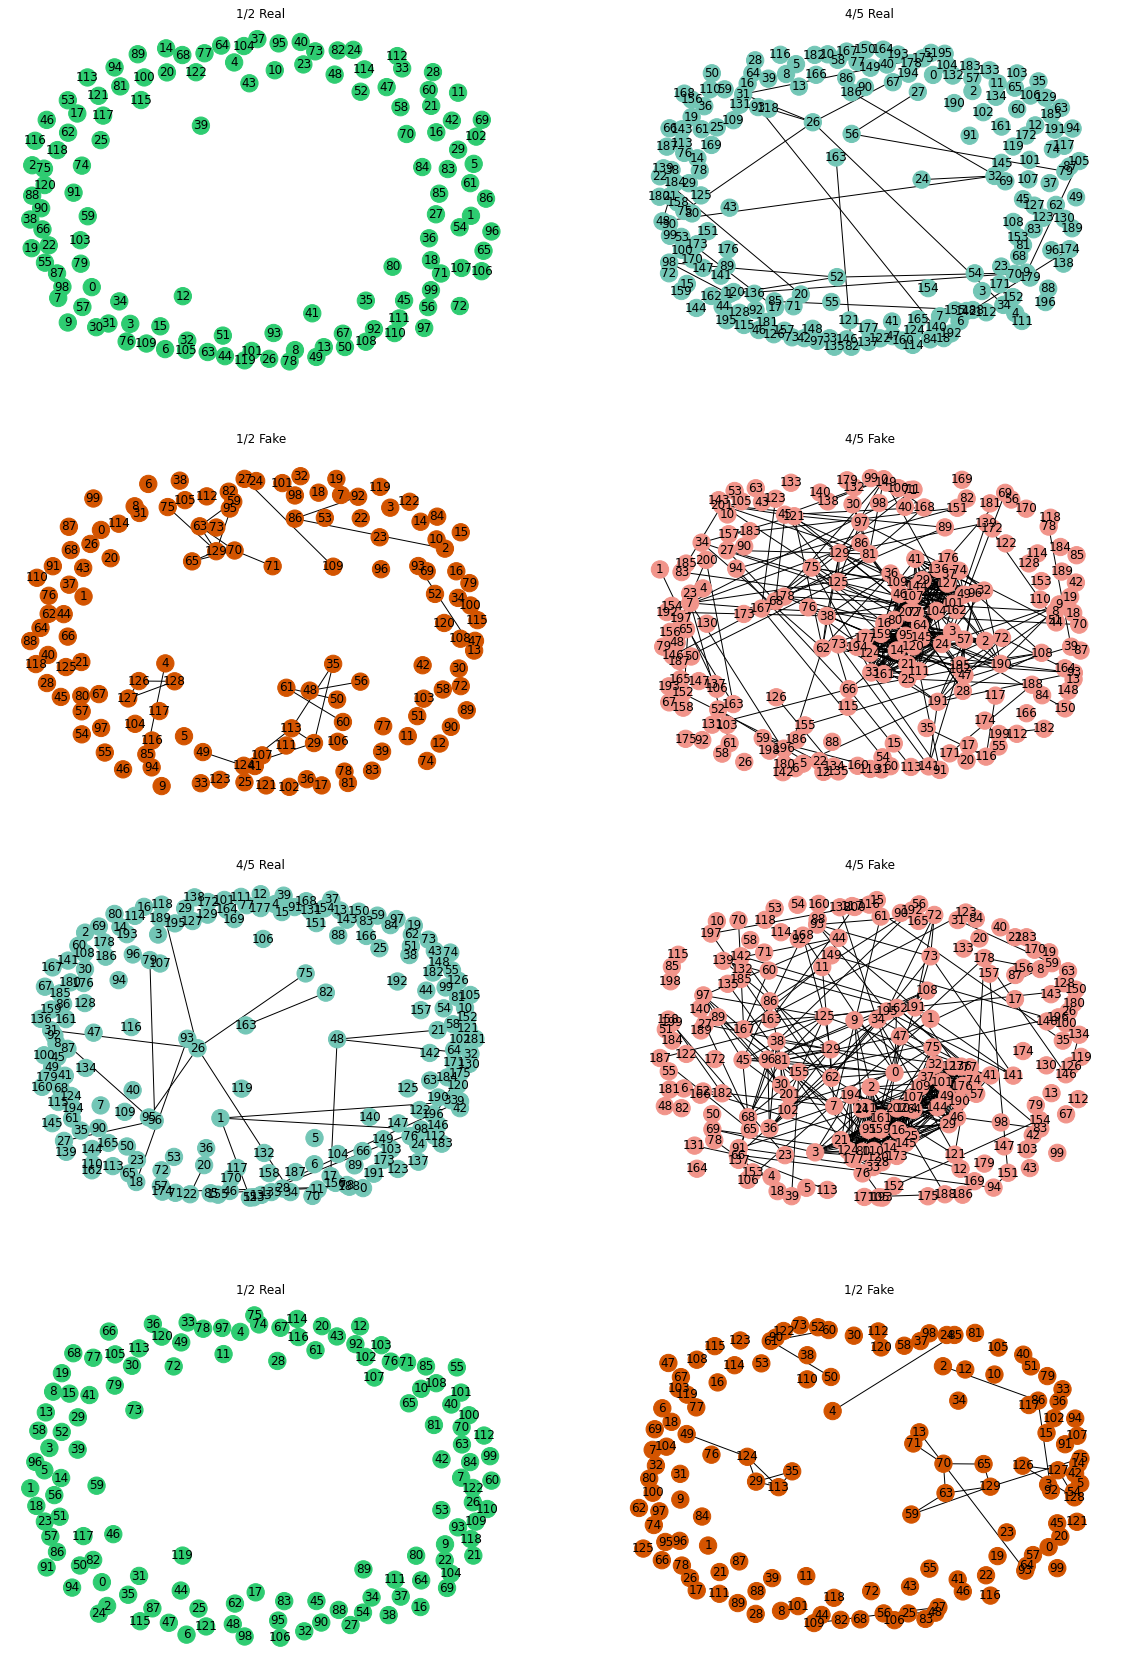

In [ ]:
plt.figure(figsize=(20,30))

plt.subplot(421)
nx.draw(G_12_Real,with_labels=True,node_color=G_12_Real_color,pos=nx.spring_layout(G_12_Real, k=0.6, iterations=20))
plt.title('1/2 Real',size=12)

plt.subplot(422)
nx.draw(G_45_Real,with_labels=True,node_color=G_45_Real_color,pos=nx.spring_layout(G_45_Real, k=0.6, iterations=20))
plt.title('4/5 Real',size=12)

plt.subplot(423)
nx.draw(G_12_Fake,with_labels=True,node_color=G_12_Fake_color,pos=nx.spring_layout(G_12_Fake, k=0.6, iterations=20))
plt.title('1/2 Fake',size=12)

plt.subplot(424)
nx.draw(G_45_Fake,with_labels=True,node_color=G_45_Fake_color,pos=nx.spring_layout(G_45_Fake, k=0.6, iterations=20))
plt.title('4/5 Fake',size=12)


plt.subplot(425)
nx.draw(G_45_Real,with_labels=True,node_color=G_45_Real_color,pos=nx.spring_layout(G_45_Real, k=0.6, iterations=20))
plt.title('4/5 Real',size=12)

plt.subplot(426)
nx.draw(G_45_Fake,with_labels=True,node_color=G_45_Fake_color,pos=nx.spring_layout(G_45_Fake, k=0.6, iterations=20))
plt.title('4/5 Fake',size=12)

plt.subplot(427)
nx.draw(G_12_Real,with_labels=True,node_color=G_12_Real_color,pos=nx.spring_layout(G_12_Real, k=0.6, iterations=20))
plt.title('1/2 Real',size=12)

plt.subplot(428)
nx.draw(G_12_Fake,with_labels=True,node_color=G_12_Fake_color,pos=nx.spring_layout(G_12_Fake, k=0.6, iterations=20))
plt.title('1/2 Fake',size=12)

plt.show()

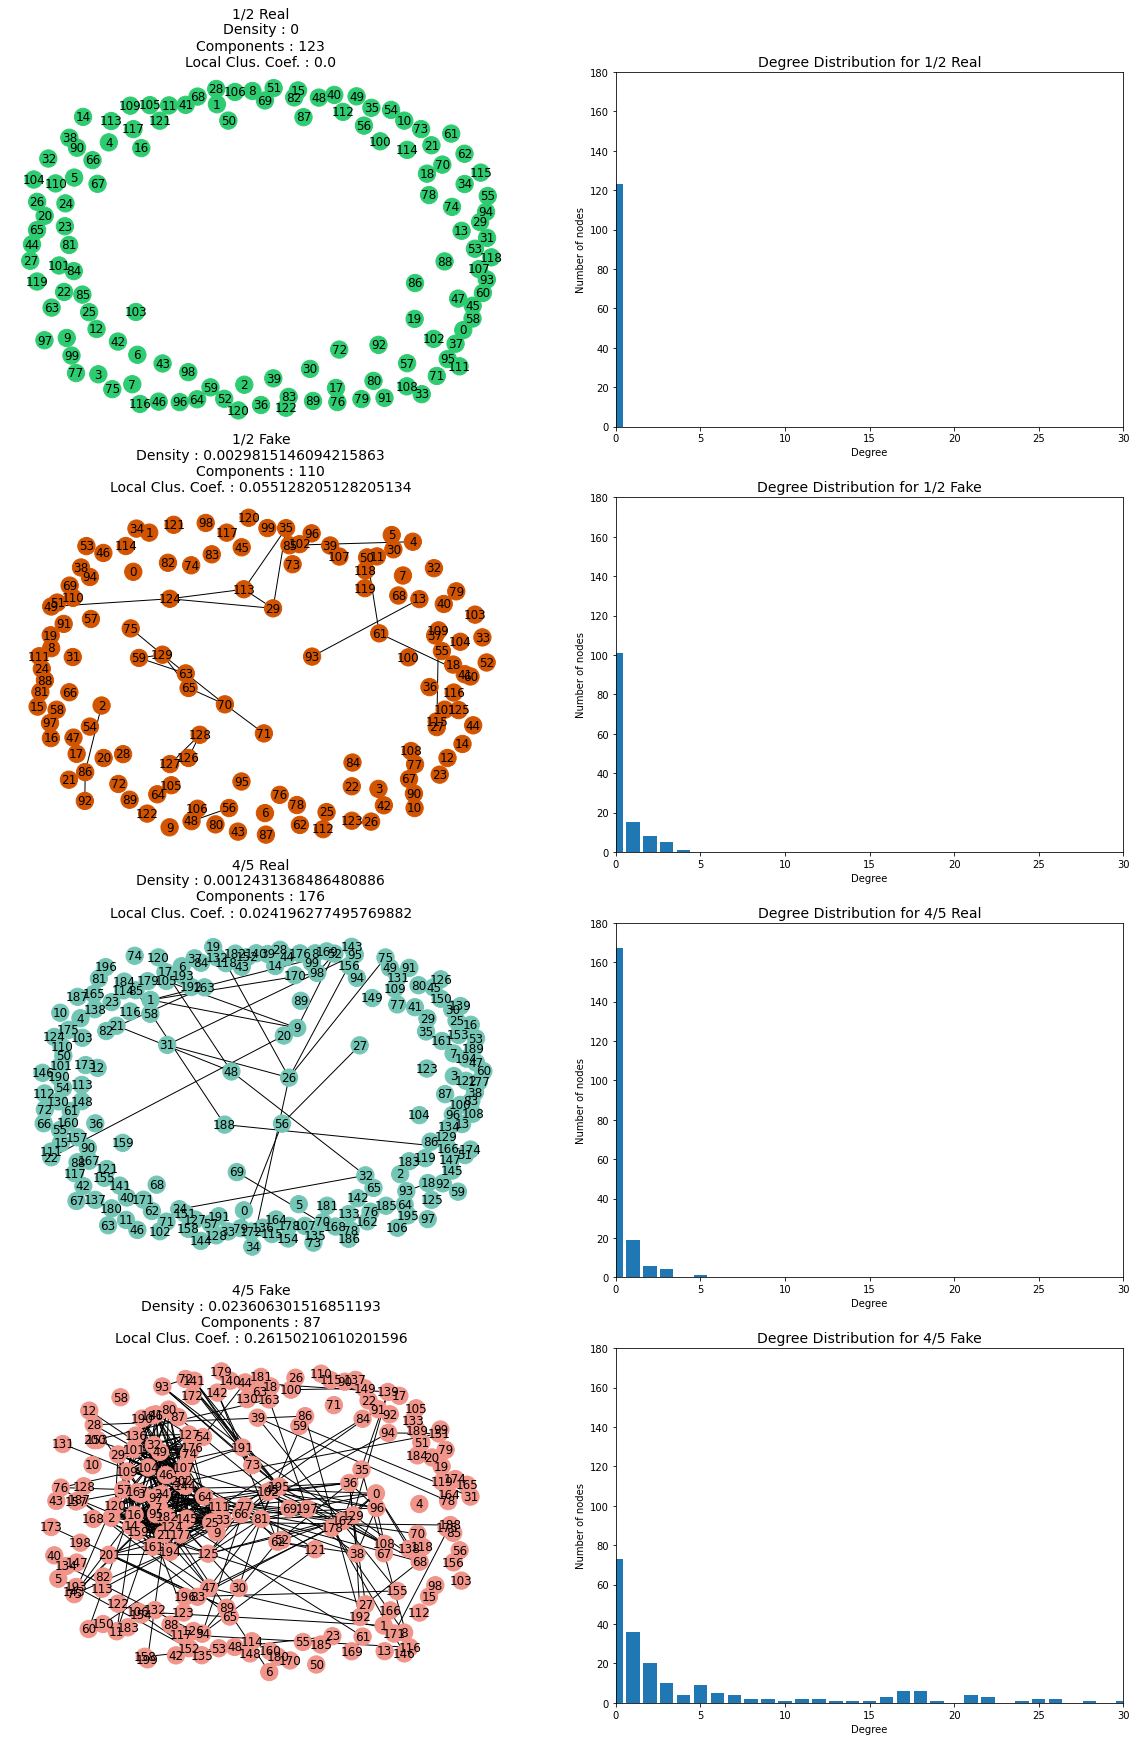

In [ ]:
# with bar graph
from collections import Counter
import seaborn as sns

plt.figure(figsize=(20,30))

plt.subplot(421)
nx.draw(G_12_Real,with_labels=True,node_color=G_12_Real_color,pos=nx.spring_layout(G_12_Real, k=0.6, iterations=20))
density = nx.density(G_12_Real)
no_comp = nx.number_connected_components(G_12_Real)
avg_clus_coef = nx.average_clustering(G_12_Real)
title = "1/2 Real\n" + "Density : " + str(density) +"\nComponents : " + str(no_comp) + "\nLocal Clus. Coef. : " + str(avg_clus_coef)
plt.title(title,size=14)

plt.subplot(422)
degrees = [G_12_Real.degree(n) for n in G_12_Real.nodes()]
b1 = dict(Counter(degrees))
plt.bar(*zip(*b1.items()))
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.axis([0, 30, 0, 180])
plt.title("Degree Distribution for 1/2 Real",size=14)

plt.subplot(423)
nx.draw(G_12_Fake,with_labels=True,node_color=G_12_Fake_color,pos=nx.spring_layout(G_12_Fake, k=0.6, iterations=20))
density = nx.density(G_12_Fake)
no_comp = nx.number_connected_components(G_12_Fake)
avg_clus_coef = nx.average_clustering(G_12_Fake)
title = "1/2 Fake\n" + "Density : " + str(density) +"\nComponents : " + str(no_comp) + "\nLocal Clus. Coef. : " + str(avg_clus_coef)
plt.title(title,size=14)

plt.subplot(424)
degrees = [G_12_Fake.degree(n) for n in G_12_Fake.nodes()]
b1 = dict(Counter(degrees))
plt.bar(*zip(*b1.items()))
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.axis([0, 30, 0, 180])
plt.title("Degree Distribution for 1/2 Fake",size=14)

plt.subplot(425)
nx.draw(G_45_Real,with_labels=True,node_color=G_45_Real_color,pos=nx.spring_layout(G_45_Real, k=0.6, iterations=20))
density = nx.density(G_45_Real)
no_comp = nx.number_connected_components(G_45_Real)
avg_clus_coef = nx.average_clustering(G_45_Real)
title = "4/5 Real\n" + "Density : " + str(density) +"\nComponents : " + str(no_comp) + "\nLocal Clus. Coef. : " + str(avg_clus_coef)
plt.title(title,size=14)

plt.subplot(426)
degrees = [G_45_Real.degree(n) for n in G_45_Real.nodes()]
b1 = dict(Counter(degrees))
plt.bar(*zip(*b1.items()))
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.axis([0, 30, 0, 180])
plt.title("Degree Distribution for 4/5 Real",size=14)

plt.subplot(427)
nx.draw(G_45_Fake,with_labels=True,node_color=G_45_Fake_color,pos=nx.spring_layout(G_45_Fake, k=0.6, iterations=20))
density = nx.density(G_45_Fake)
no_comp = nx.number_connected_components(G_45_Fake)
avg_clus_coef = nx.average_clustering(G_45_Fake)
title = "4/5 Fake\n" + "Density : " + str(density) +"\nComponents : " + str(no_comp) + "\nLocal Clus. Coef. : " + str(avg_clus_coef)
plt.title(title,size=14)

plt.subplot(428)
degrees = [G_45_Fake.degree(n) for n in G_45_Fake.nodes()]
b1 = dict(Counter(degrees))
plt.bar(*zip(*b1.items()))
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.axis([0, 30, 0, 180])
plt.title("Degree Distribution for 4/5 Fake",size=14)

plt.show()

# Generating Various Networks - Part 2

In [ ]:
threshold = 0

## greedy_modularity_communities

In [ ]:
import seaborn as sns

### Community Detection in 4/5 Real Dataset

In [ ]:
from networkx.algorithms import community
communities_45_Real = community.greedy_modularity_communities(G_45_Real)

print(f"number of communities: {len(communities_45_Real)}")

G_45_Real_color_communities = []

for i,c in enumerate(communities_45_Real): # Loop through the list of communities
  if i < 3: 
    print('Class '+str(i)+':', list(c))
  for cl in list(c):
    if(i==0):
      G_45_Real_color_communities.append('red')
    elif(i==1):
      G_45_Real_color_communities.append('yellow')
    elif(i==2):
      G_45_Real_color_communities.append('cyan')
    else:
      G_45_Real_color_communities.append('#EBF5FB')

number of communities: 176
Class 0: [34, 118, 26, 75, 31, 95]
Class 1: [32, 48, 17, 21, 24]
Class 2: [1, 98, 105, 52, 9]


In [ ]:
len_comm_dict_45_Real = {}
for i,c in enumerate(communities_45_Real):
  length_of_comm = len(list(c))
  if(length_of_comm in len_comm_dict_45_Real):
    len_comm_dict_45_Real[length_of_comm]+=1
  else:
    len_comm_dict_45_Real[length_of_comm] = 1

x_45_Real = list(len_comm_dict_45_Real.keys())
y_45_Real = list(len_comm_dict_45_Real.values())

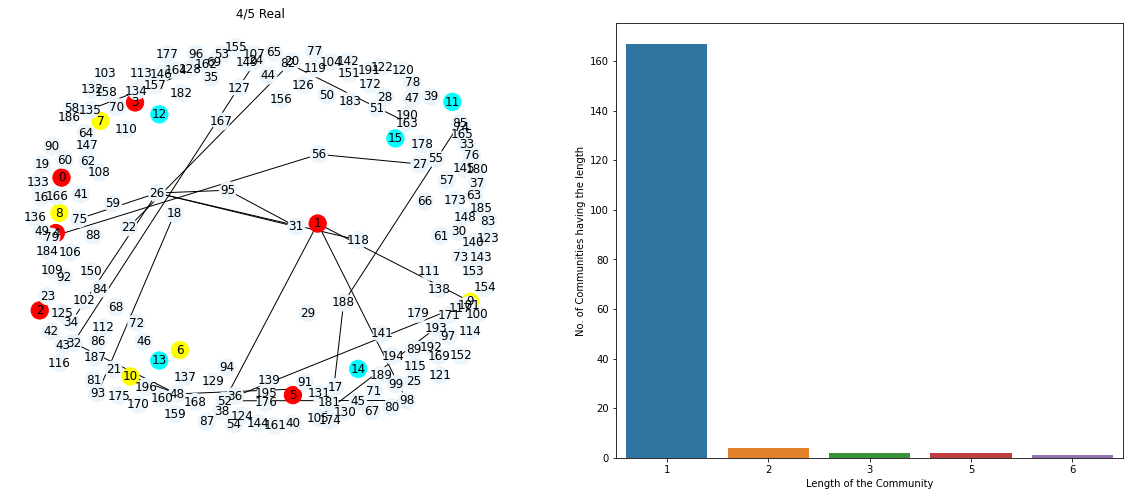

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
nx.draw(G_45_Real,with_labels=True,node_color=G_45_Real_color_communities,pos=nx.spring_layout(G_45_Real, k=0.6, iterations=20))
plt.title('4/5 Real',size=12)

plt.subplot(122)
sns.barplot(x_45_Real,y_45_Real)
plt.xlabel("Length of the Community")
plt.ylabel("No. of Communities having the length")

plt.show()

### Community Detection in 4/5 Fake Dataset

In [ ]:
from networkx.algorithms import community
communities_45_Fake = community.greedy_modularity_communities(G_45_Fake)

print(f"number of communities: {len(communities_45_Fake)}")

G_45_Fake_color_communities = []

for i,c in enumerate(communities_45_Fake): # Loop through the list of communities
  if i < 3: 
    print('Class '+str(i)+':', list(c))
  for cl in list(c):
    if(i==0):
      G_45_Fake_color_communities.append('red')
    elif(i==1):
      G_45_Fake_color_communities.append('yellow')
    elif(i==2):
      G_45_Fake_color_communities.append('cyan')
    else:
      G_45_Fake_color_communities.append('#EBF5FB')


number of communities: 91
Class 0: [0, 129, 131, 8, 138, 139, 141, 142, 146, 150, 27, 28, 30, 34, 162, 36, 38, 168, 44, 173, 45, 47, 178, 57, 187, 62, 191, 192, 65, 66, 195, 68, 72, 73, 201, 76, 77, 81, 83, 86, 89, 93, 96, 97, 102, 108, 113, 121, 125]
Class 1: [64, 2, 194, 3, 69, 9, 202, 14, 16, 145, 80, 21, 24, 25, 91, 159, 95, 33, 161, 104, 111, 177, 120, 124, 190]
Class 2: [32, 101, 37, 136, 41, 74, 107, 75, 109, 46, 144, 49, 176, 29, 127]


In [ ]:
len_comm_dict_45_Fake = {}
for i,c in enumerate(communities_45_Fake):
  length_of_comm = len(list(c))
  if(length_of_comm in len_comm_dict_45_Fake):
    len_comm_dict_45_Fake[length_of_comm]+=1
  else:
    len_comm_dict_45_Fake[length_of_comm] = 1

x_45_Fake = list(len_comm_dict_45_Fake.keys())
y_45_Fake = list(len_comm_dict_45_Fake.values())

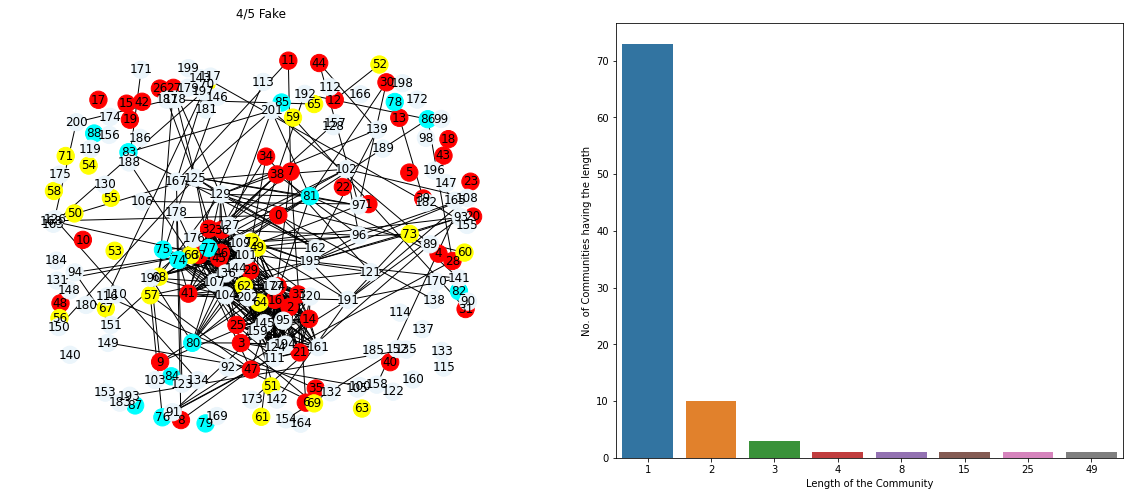

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
nx.draw(G_45_Fake,with_labels=True,node_color=G_45_Fake_color_communities,pos=nx.spring_layout(G_45_Fake, k=0.6, iterations=20))
plt.title('4/5 Fake',size=12)

plt.subplot(122)
sns.barplot(x_45_Fake,y_45_Fake)
plt.xlabel("Length of the Community")
plt.ylabel("No. of Communities having the length")

plt.show()

### Generate Networks for Three Biggest Communities

In [ ]:
Top3_45_Real = {0:[],1:[],2:[]}

for i,c in enumerate(communities_45_Real):
  if i < 3: 
    Top3_45_Real[i] = list(c)
print(Top3_45_Real)

{0: [34, 118, 26, 75, 31, 95], 1: [32, 48, 17, 21, 24], 2: [1, 98, 105, 52, 9]}


In [ ]:
Top3_45_Fake = {0:[],1:[],2:[]}

for i,c in enumerate(communities_45_Fake):
  if i < 3: 
    Top3_45_Fake[i] = list(c)
print(Top3_45_Fake)

{0: [0, 129, 131, 8, 138, 139, 141, 142, 146, 150, 27, 28, 30, 34, 162, 36, 38, 168, 44, 173, 45, 47, 178, 57, 187, 62, 191, 192, 65, 66, 195, 68, 72, 73, 201, 76, 77, 81, 83, 86, 89, 93, 96, 97, 102, 108, 113, 121, 125], 1: [64, 2, 194, 3, 69, 9, 202, 14, 16, 145, 80, 21, 24, 25, 91, 159, 95, 33, 161, 104, 111, 177, 120, 124, 190], 2: [32, 101, 37, 136, 41, 74, 107, 75, 109, 46, 144, 49, 176, 29, 127]}


In [ ]:
Top3_45_Real_Networks = {0:[],1:[],2:[]}

for i in Top3_45_Real_Networks:
  temp_nodes = Top3_45_Real[i]
  G = nx.Graph()
  for n in temp_nodes:
    G.add_node(n)

  for a in temp_nodes:
    for b in temp_nodes:
      if(a!=b):
        t = find_common_with_thresh2(short_ks_data['NLP_text'][a],short_ks_data['NLP_text'][b],(a,b))
        if(t != 0):
          G.add_edge(a,b,weight=t)
  
  Top3_45_Real_Networks[i] = G

In [ ]:
Top3_45_Fake_Networks = {0:[],1:[],2:[]}

for i in Top3_45_Fake_Networks:
  temp_nodes = Top3_45_Fake[i]
  G = nx.Graph()
  for n in temp_nodes:
    G.add_node(n)

  for a in temp_nodes:
    for b in temp_nodes:
      if(a!=b):
        t = find_common_with_thresh2(short_ks_data['NLP_text'][a],short_ks_data['NLP_text'][b],(a,b))
        if(t != 0):
          G.add_edge(a,b,weight=t)
  
  Top3_45_Fake_Networks[i] = G

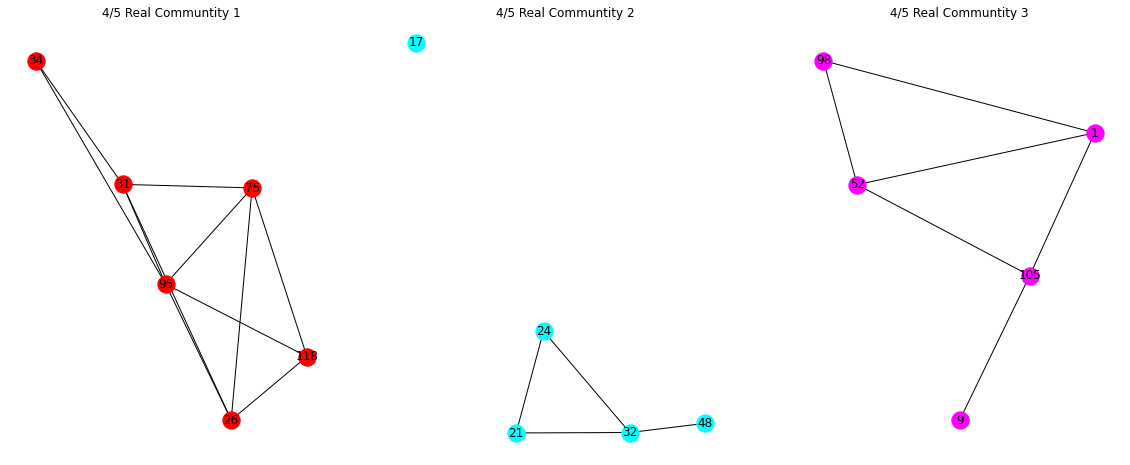

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(131)
nx.draw(Top3_45_Real_Networks[0],with_labels=True,node_color='red',pos=nx.spring_layout(Top3_45_Real_Networks[0], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 1',size=12)

plt.subplot(132)
nx.draw(Top3_45_Real_Networks[1],with_labels=True,node_color='cyan',pos=nx.spring_layout(Top3_45_Real_Networks[1], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 2',size=12)

plt.subplot(133)
nx.draw(Top3_45_Real_Networks[2],with_labels=True,node_color='magenta',pos=nx.spring_layout(Top3_45_Real_Networks[2], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 3',size=12)

plt.show()

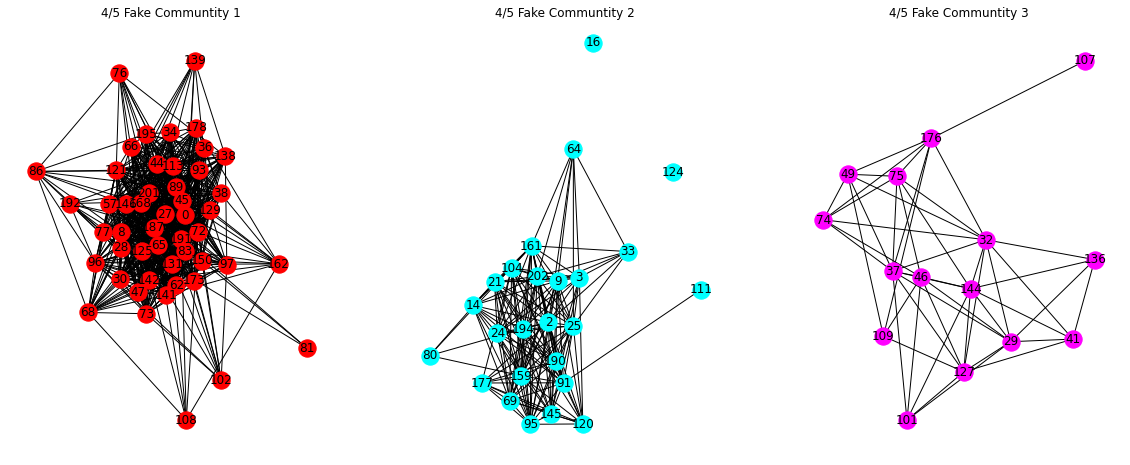

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(131)
nx.draw(Top3_45_Fake_Networks[0],with_labels=True,node_color='red',pos=nx.spring_layout(Top3_45_Fake_Networks[0], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 1',size=12)

plt.subplot(132)
nx.draw(Top3_45_Fake_Networks[1],with_labels=True,node_color='cyan',pos=nx.spring_layout(Top3_45_Fake_Networks[1], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 2',size=12)

plt.subplot(133)
nx.draw(Top3_45_Fake_Networks[2],with_labels=True,node_color='magenta',pos=nx.spring_layout(Top3_45_Fake_Networks[2], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 3',size=12)

plt.show()

### Generate Word Clouds for the 3 biggest communitites

In [ ]:
from wordcloud import WordCloud

In [ ]:
Top3_45_Real_BOW = {0:[],1:[],2:[]}

for i in Top3_45_Real_BOW:
  temp_nodes = Top3_45_Real[i]
  for j in temp_nodes:
    temp_BOW = short_ks_data['NLP_text'][j]
    for k in temp_BOW:
      Top3_45_Real_BOW[i].append(k)

In [ ]:
Top3_45_Fake_BOW = {0:[],1:[],2:[]}

for i in Top3_45_Fake_BOW:
  temp_nodes = Top3_45_Fake[i]
  for j in temp_nodes:
    temp_BOW = short_ks_data['NLP_text'][j]
    for k in temp_BOW:
      Top3_45_Fake_BOW[i].append(k)

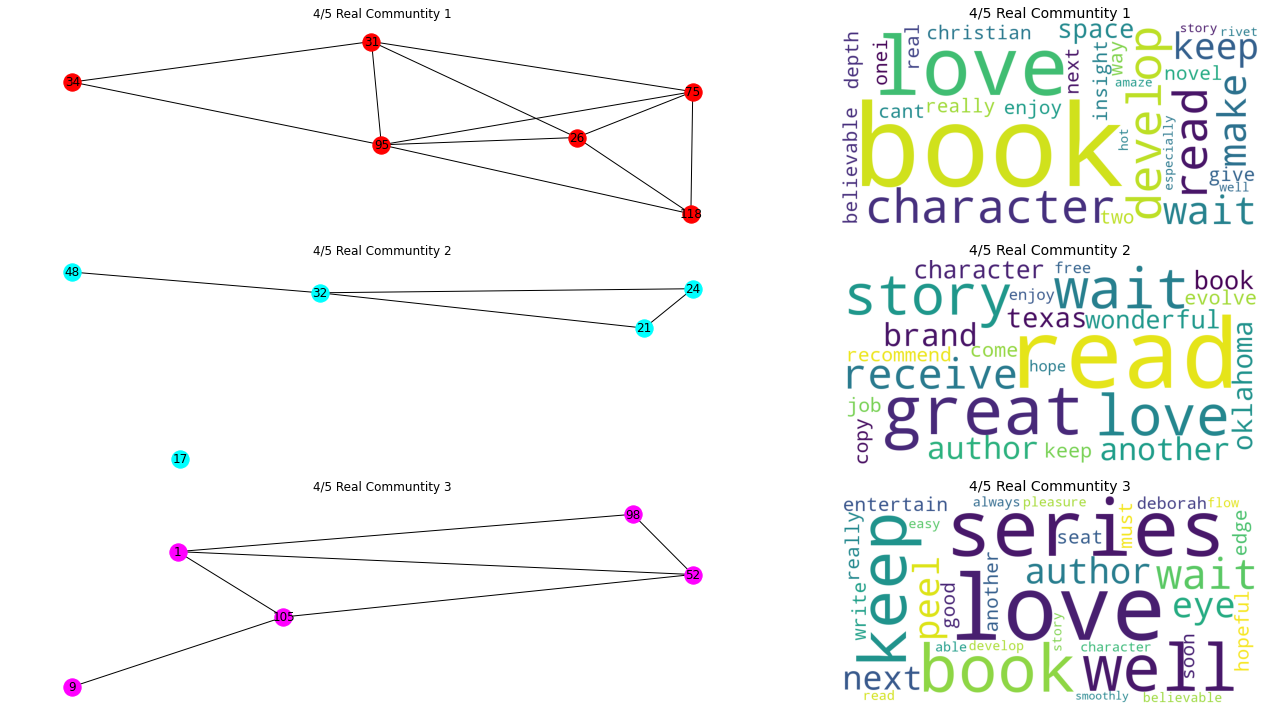

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(321)
nx.draw(Top3_45_Real_Networks[0],with_labels=True,node_color='red',pos=nx.spring_layout(Top3_45_Real_Networks[0], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 1',size=12)

plt.subplot(322)
unique_string=(" ").join(Top3_45_Real_BOW[0])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Real Communtity 1',size=14)
plt.axis("off")

plt.subplot(323)
nx.draw(Top3_45_Real_Networks[1],with_labels=True,node_color='cyan',pos=nx.spring_layout(Top3_45_Real_Networks[1], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 2',size=12)

plt.subplot(324)
unique_string=(" ").join(Top3_45_Real_BOW[1])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Real Communtity 2',size=14)
plt.axis("off")

plt.subplot(325)
nx.draw(Top3_45_Real_Networks[2],with_labels=True,node_color='magenta',pos=nx.spring_layout(Top3_45_Real_Networks[2], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 3',size=12)

plt.subplot(326)
unique_string=(" ").join(Top3_45_Real_BOW[2])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Real Communtity 3',size=14)
plt.axis("off")

plt.tight_layout()
plt.show()

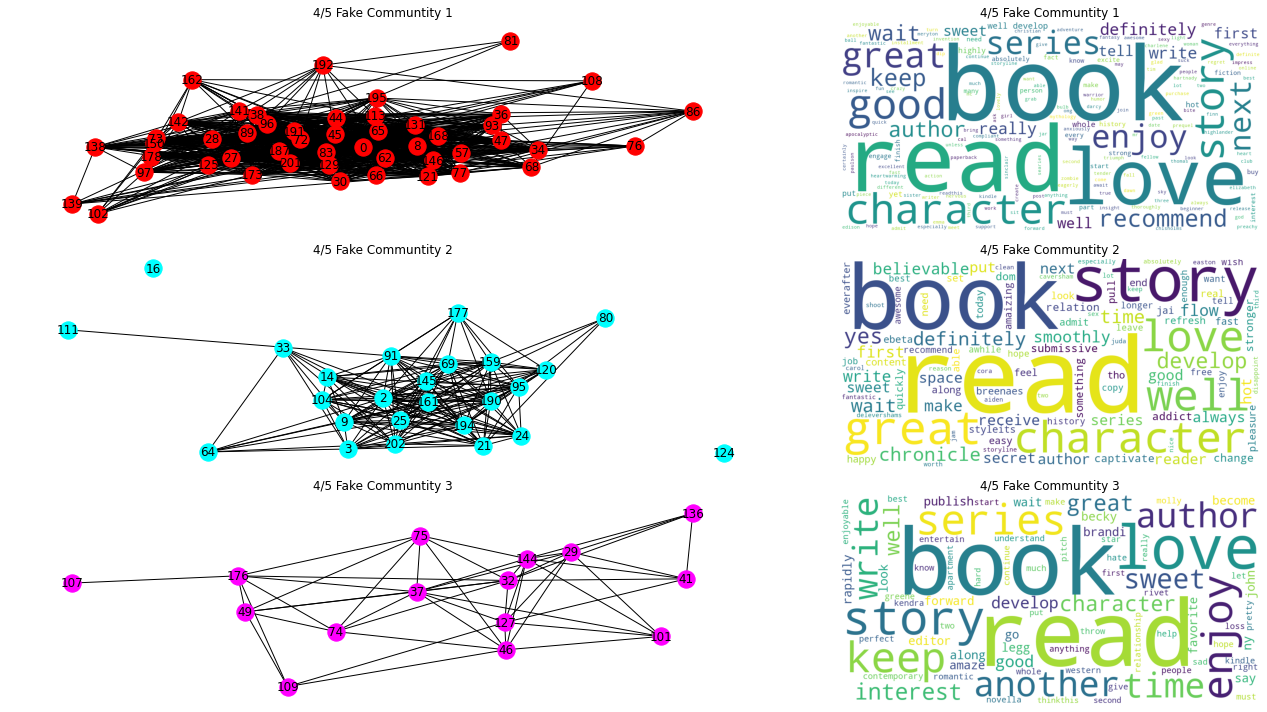

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(321)
nx.draw(Top3_45_Fake_Networks[0],with_labels=True,node_color='red',pos=nx.spring_layout(Top3_45_Fake_Networks[0], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 1',size=12)

plt.subplot(322)
unique_string=(" ").join(Top3_45_Fake_BOW[0])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Fake Communtity 1',size=12)
plt.axis("off")

plt.subplot(323)
nx.draw(Top3_45_Fake_Networks[1],with_labels=True,node_color='cyan',pos=nx.spring_layout(Top3_45_Fake_Networks[1], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 2',size=12)

plt.subplot(324)
unique_string=(" ").join(Top3_45_Fake_BOW[1])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Fake Communtity 2',size=12)
plt.axis("off")

plt.subplot(325)
nx.draw(Top3_45_Fake_Networks[2],with_labels=True,node_color='magenta',pos=nx.spring_layout(Top3_45_Fake_Networks[2], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 3',size=12)

plt.subplot(326)
unique_string=(" ").join(Top3_45_Fake_BOW[2])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Fake Communtity 3',size=12)
plt.axis("off")

plt.tight_layout()
plt.show()

## girvan_newman

In [ ]:
import seaborn as sns

### Community Detection in 4/5 Real Dataset

In [ ]:
from networkx.algorithms import community
communities_45_Real = community.girvan_newman(G_45_Real)
next_level_communities = next(communities_45_Real)
l = sorted(map(sorted, next_level_communities))
l.sort(key = len,reverse=True)
GV_communities_45_Real = {0:l[0],1:l[1],2:l[2]}

print(f"number of communities: {len(l)}")

G_45_Real_color_communities = ['#EBF5FB' for i in range(len(G_45_Real.nodes))]

for i in GV_communities_45_Real: # Loop through the list of communities
  c = GV_communities_45_Real[i]
  print("Class ",i," : ",c)
  for x in c:
    if(i==0):
      G_45_Real_color_communities[x] = 'red'
    elif(i==1):
      G_45_Real_color_communities[x] = 'yellow'
    elif(i==2):
      G_45_Real_color_communities[x] = 'cyan'

number of communities: 177
Class  0  :  [26, 31, 34, 75, 95, 118]
Class  1  :  [1, 9, 52, 98, 105]
Class  2  :  [17, 21, 48]


In [ ]:
len_comm_dict_45_Real = {}
for i  in l:
  length_of_comm = len(i)
  if(length_of_comm in len_comm_dict_45_Real):
    len_comm_dict_45_Real[length_of_comm]+=1
  else:
    len_comm_dict_45_Real[length_of_comm] = 1

x_45_Real = list(len_comm_dict_45_Real.keys())
y_45_Real = list(len_comm_dict_45_Real.values())

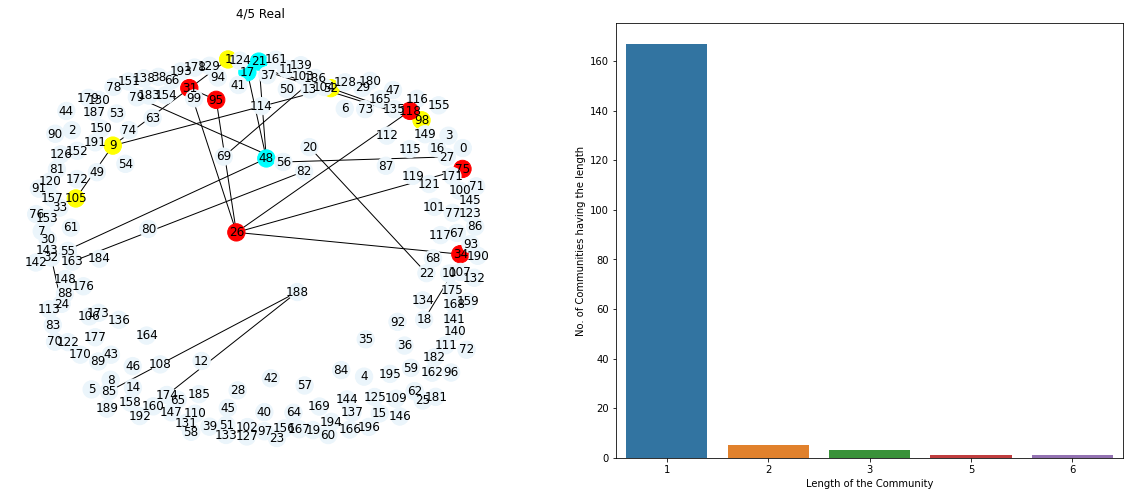

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
nx.draw(G_45_Real,with_labels=True,node_color=G_45_Real_color_communities,pos=nx.spring_layout(G_45_Real, k=0.6, iterations=20))
plt.title('4/5 Real',size=12)

plt.subplot(122)
sns.barplot(x_45_Real,y_45_Real)
plt.xlabel("Length of the Community")
plt.ylabel("No. of Communities having the length")

plt.show()

### Community Detection in 4/5 Fake Dataset

In [ ]:
from networkx.algorithms import community
communities_45_Fake = community.girvan_newman(G_45_Fake)
next_level_communities = next(communities_45_Fake)
l = sorted(map(sorted, next_level_communities))
l.sort(key = len,reverse=True)
GV_communities_45_Fake = {0:l[0],1:l[1],2:l[2]}

print(f"number of communities: {len(l)}")

G_45_Fake_color_communities = ['#EBF5FB' for i in range(len(G_45_Fake.nodes))]

for i in GV_communities_45_Fake: # Loop through the list of communities
  c = GV_communities_45_Fake[i]
  print("Class ",i," : ",c)
  for x in c:
    if(i==0):
      G_45_Fake_color_communities[x] = 'red'
    elif(i==1):
      G_45_Fake_color_communities[x] = 'yellow'
    elif(i==2):
      G_45_Fake_color_communities[x] = 'cyan'

number of communities: 88
Class  0  :  [0, 8, 27, 28, 30, 34, 36, 38, 44, 45, 47, 57, 62, 65, 66, 68, 72, 73, 76, 77, 81, 83, 86, 89, 93, 94, 96, 97, 102, 108, 113, 121, 125, 129, 131, 138, 139, 141, 142, 146, 150, 151, 157, 162, 168, 173, 178, 187, 191, 192, 195, 201]
Class  1  :  [2, 3, 9, 14, 16, 21, 24, 25, 29, 32, 33, 37, 41, 46, 49, 64, 69, 74, 75, 80, 91, 95, 101, 104, 107, 109, 111, 120, 124, 127, 136, 144, 145, 159, 161, 171, 176, 177, 188, 190, 194, 202]
Class  2  :  [6, 7, 11, 60, 61, 70, 123, 167]


In [ ]:
len_comm_dict_45_Fake = {}
for i  in l:
  length_of_comm = len(i)
  if(length_of_comm in len_comm_dict_45_Fake):
    len_comm_dict_45_Fake[length_of_comm]+=1
  else:
    len_comm_dict_45_Fake[length_of_comm] = 1

x_45_Fake = list(len_comm_dict_45_Fake.keys())
y_45_Fake = list(len_comm_dict_45_Fake.values())

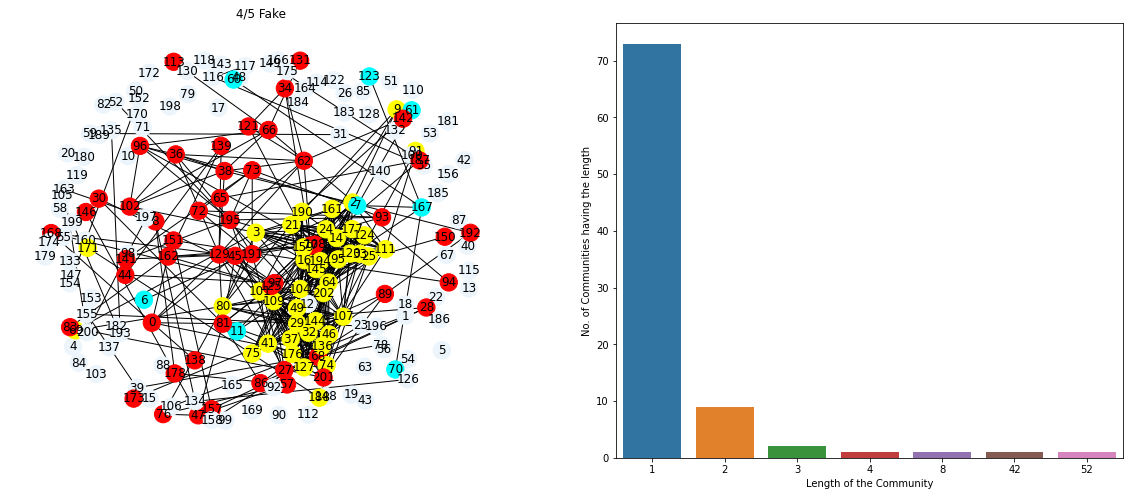

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
nx.draw(G_45_Fake,with_labels=True,node_color=G_45_Fake_color_communities,pos=nx.spring_layout(G_45_Fake, k=0.6, iterations=20))
plt.title('4/5 Fake',size=12)

plt.subplot(122)
sns.barplot(x_45_Fake,y_45_Fake)
plt.xlabel("Length of the Community")
plt.ylabel("No. of Communities having the length")

plt.show()

### Generate Networks for Three Biggest Communities

In [ ]:
Top3_45_Real = GV_communities_45_Real
Top3_45_Fake = GV_communities_45_Fake

In [ ]:
Top3_45_Real_Networks = {0:[],1:[],2:[]}

for i in Top3_45_Real_Networks:
  temp_nodes = Top3_45_Real[i]
  G = nx.Graph()
  for n in temp_nodes:
    G.add_node(n)

  for a in temp_nodes:
    for b in temp_nodes:
      if(a!=b):
        t = find_common_with_thresh2(short_ks_data['NLP_text'][a],short_ks_data['NLP_text'][b],(a,b))
        if(t != 0):
          G.add_edge(a,b,weight=t)
  
  Top3_45_Real_Networks[i] = G

In [ ]:
Top3_45_Fake_Networks = {0:[],1:[],2:[]}

for i in Top3_45_Fake_Networks:
  temp_nodes = Top3_45_Fake[i]
  G = nx.Graph()
  for n in temp_nodes:
    G.add_node(n)

  for a in temp_nodes:
    for b in temp_nodes:
      if(a!=b):
        t = find_common_with_thresh2(short_ks_data['NLP_text'][a],short_ks_data['NLP_text'][b],(a,b))
        if(t != 0):
          G.add_edge(a,b,weight=t)
  
  Top3_45_Fake_Networks[i] = G

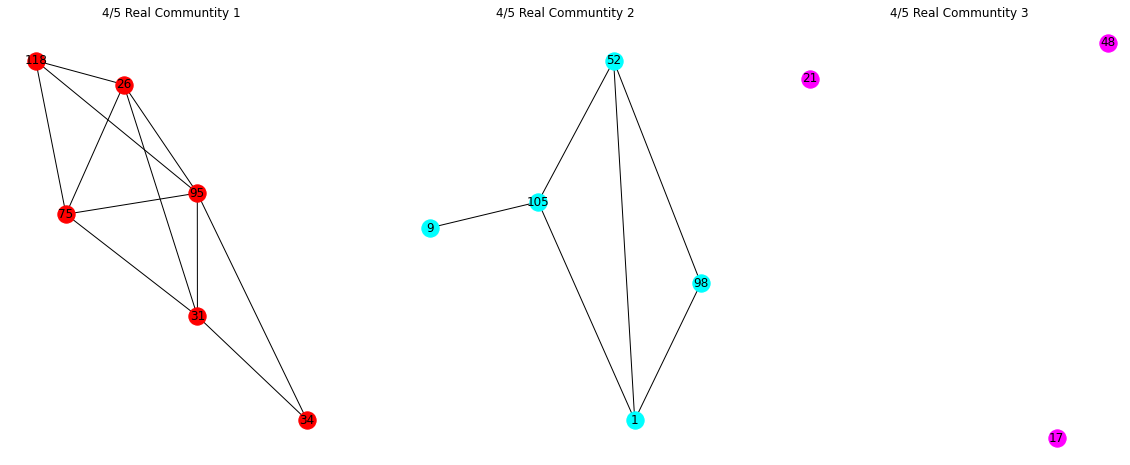

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(131)
nx.draw(Top3_45_Real_Networks[0],with_labels=True,node_color='red',pos=nx.spring_layout(Top3_45_Real_Networks[0], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 1',size=12)

plt.subplot(132)
nx.draw(Top3_45_Real_Networks[1],with_labels=True,node_color='cyan',pos=nx.spring_layout(Top3_45_Real_Networks[1], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 2',size=12)

plt.subplot(133)
nx.draw(Top3_45_Real_Networks[2],with_labels=True,node_color='magenta',pos=nx.spring_layout(Top3_45_Real_Networks[2], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 3',size=12)

plt.show()

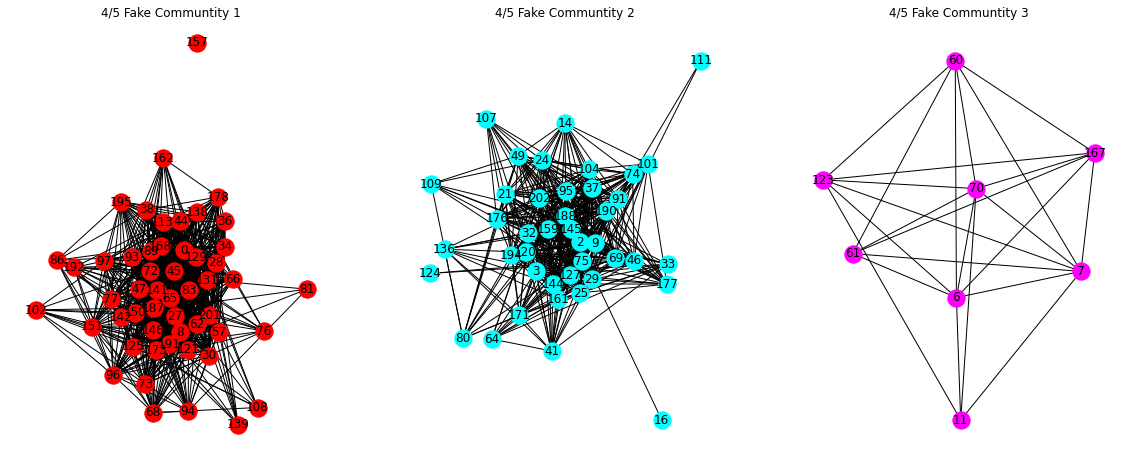

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(131)
nx.draw(Top3_45_Fake_Networks[0],with_labels=True,node_color='red',pos=nx.spring_layout(Top3_45_Fake_Networks[0], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 1',size=12)

plt.subplot(132)
nx.draw(Top3_45_Fake_Networks[1],with_labels=True,node_color='cyan',pos=nx.spring_layout(Top3_45_Fake_Networks[1], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 2',size=12)

plt.subplot(133)
nx.draw(Top3_45_Fake_Networks[2],with_labels=True,node_color='magenta',pos=nx.spring_layout(Top3_45_Fake_Networks[2], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 3',size=12)

plt.show()

### Generate Word Clouds for the 3 biggest communitites

In [ ]:
from wordcloud import WordCloud

In [ ]:
Top3_45_Real_BOW = {0:[],1:[],2:[]}

for i in Top3_45_Real_BOW:
  temp_nodes = Top3_45_Real[i]
  for j in temp_nodes:
    temp_BOW = short_ks_data['NLP_text'][j]
    for k in temp_BOW:
      Top3_45_Real_BOW[i].append(k)

In [ ]:
Top3_45_Fake_BOW = {0:[],1:[],2:[]}

for i in Top3_45_Fake_BOW:
  temp_nodes = Top3_45_Fake[i]
  for j in temp_nodes:
    temp_BOW = short_ks_data['NLP_text'][j]
    for k in temp_BOW:
      Top3_45_Fake_BOW[i].append(k)

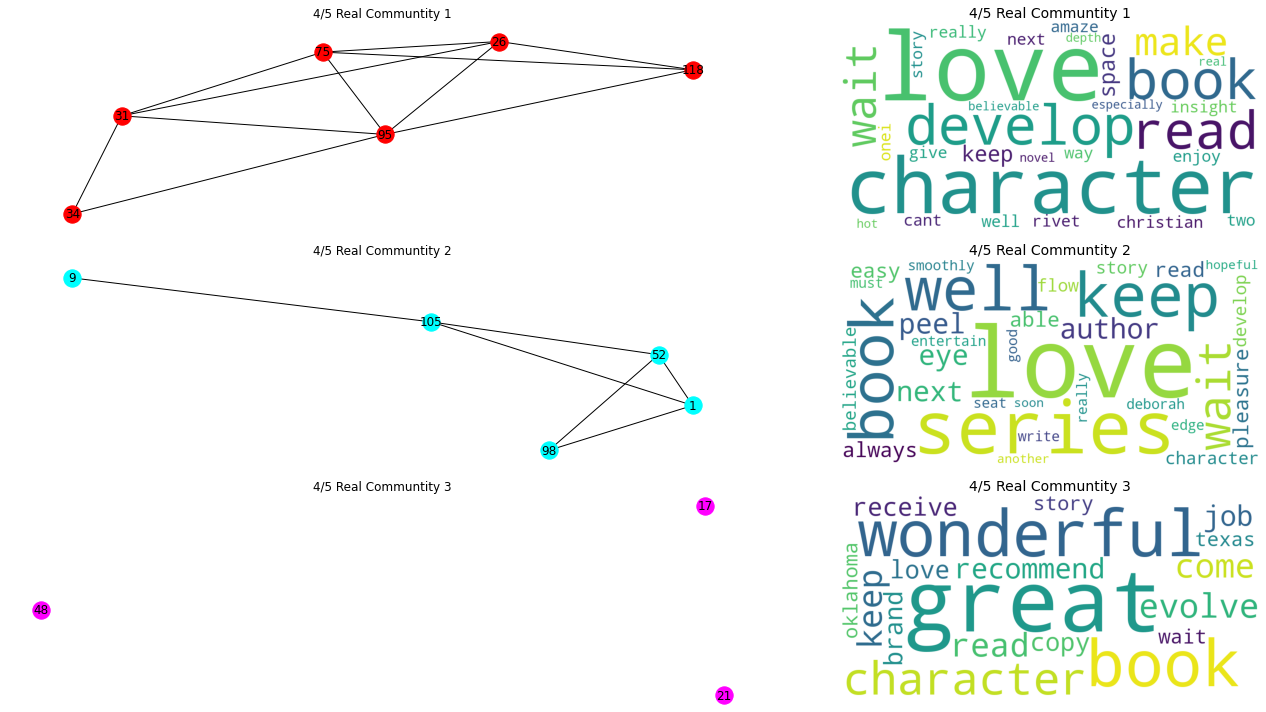

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(321)
nx.draw(Top3_45_Real_Networks[0],with_labels=True,node_color='red',pos=nx.spring_layout(Top3_45_Real_Networks[0], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 1',size=12)

plt.subplot(322)
unique_string=(" ").join(Top3_45_Real_BOW[0])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Real Communtity 1',size=14)
plt.axis("off")

plt.subplot(323)
nx.draw(Top3_45_Real_Networks[1],with_labels=True,node_color='cyan',pos=nx.spring_layout(Top3_45_Real_Networks[1], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 2',size=12)

plt.subplot(324)
unique_string=(" ").join(Top3_45_Real_BOW[1])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Real Communtity 2',size=14)
plt.axis("off")

plt.subplot(325)
nx.draw(Top3_45_Real_Networks[2],with_labels=True,node_color='magenta',pos=nx.spring_layout(Top3_45_Real_Networks[2], k=0.6, iterations=20))
plt.title('4/5 Real Communtity 3',size=12)

plt.subplot(326)
unique_string=(" ").join(Top3_45_Real_BOW[2])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Real Communtity 3',size=14)
plt.axis("off")

plt.tight_layout()
plt.show()

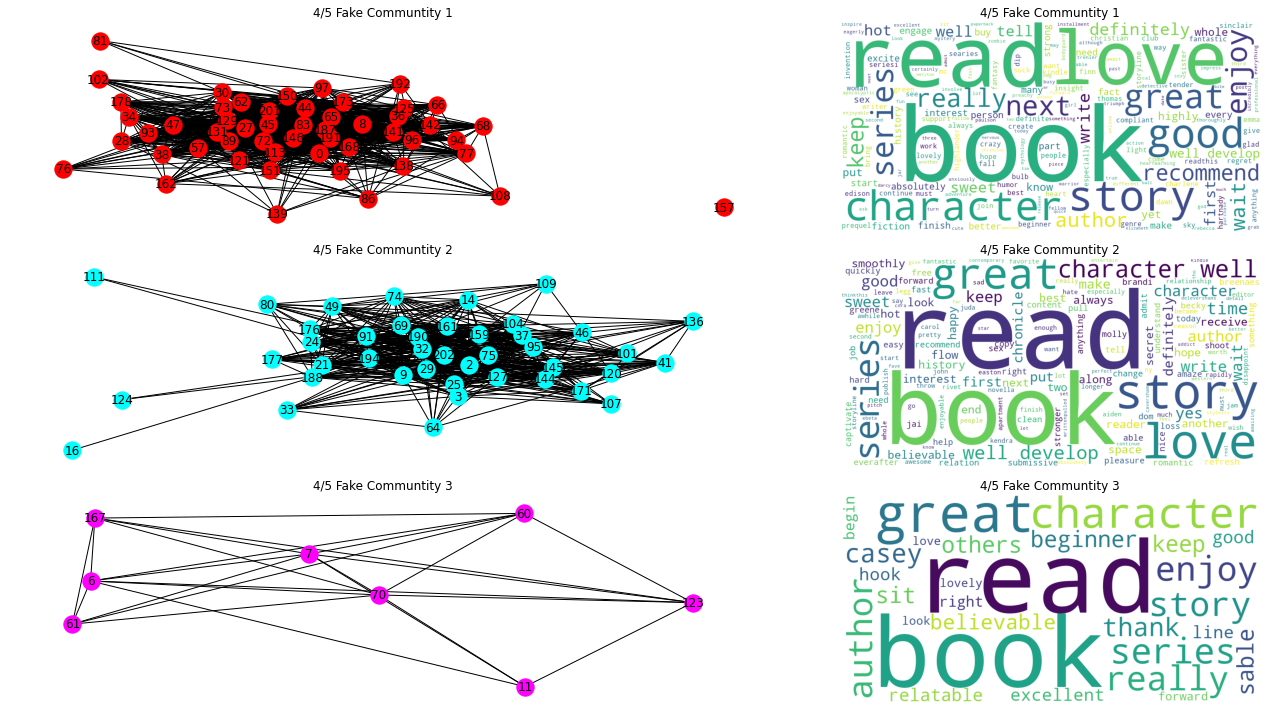

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(321)
nx.draw(Top3_45_Fake_Networks[0],with_labels=True,node_color='red',pos=nx.spring_layout(Top3_45_Fake_Networks[0], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 1',size=12)

plt.subplot(322)
unique_string=(" ").join(Top3_45_Fake_BOW[0])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Fake Communtity 1',size=12)
plt.axis("off")

plt.subplot(323)
nx.draw(Top3_45_Fake_Networks[1],with_labels=True,node_color='cyan',pos=nx.spring_layout(Top3_45_Fake_Networks[1], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 2',size=12)

plt.subplot(324)
unique_string=(" ").join(Top3_45_Fake_BOW[1])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Fake Communtity 2',size=12)
plt.axis("off")

plt.subplot(325)
nx.draw(Top3_45_Fake_Networks[2],with_labels=True,node_color='magenta',pos=nx.spring_layout(Top3_45_Fake_Networks[2], k=0.6, iterations=20))
plt.title('4/5 Fake Communtity 3',size=12)

plt.subplot(326)
unique_string=(" ").join(Top3_45_Fake_BOW[2])
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate(unique_string)
plt.imshow(wordcloud)
plt.title('4/5 Fake Communtity 3',size=12)
plt.axis("off")

plt.tight_layout()
plt.show()